To analyze and forecast the dataset you provided for National Rail using machine learning, I will outline a detailed script that includes data preprocessing, exploratory data analysis (EDA), model selection, training, and forecasting. Given that I do not yet know the structure of your dataset, I will first load and inspect it to understand its contents.

Let's start by loading and examining the dataset.

The dataset consists of 31,653 entries and 18 columns, with various attributes related to rail ticket purchases and journeys. Here’s a summary of the key columns:

1. **Date of Purchase, Time of Purchase**: Date and time when the ticket was purchased.
2. **Purchase Type, Payment Method**: The channel and method used for purchasing the ticket.
3. **Railcard, Ticket Class, Ticket Type**: Information about the railcard used, class of the ticket, and the type of ticket (e.g., Advance).
4. **Price**: The price of the ticket.
5. **Departure Station, Arrival Destination**: Start and end stations for the journey.
6. **Date of Journey, Departure Time, Arrival Time**: Scheduled journey dates and times.
7. **Actual Arrival Time**: The actual time the train arrived at the destination.
8. **Journey Status**: Indicates whether the journey was on time or delayed.
9. **Reason for Delay**: If delayed, the reason for the delay.
10. **Refund Request**: Whether a refund was requested.

### Steps to Analyze and Forecast:
1. **Data Preprocessing**:
   - Convert date and time columns to appropriate datetime formats.
   - Handle missing values, especially in the "Actual Arrival Time" and "Reason for Delay" columns.
   - Encode categorical variables.

2. **Exploratory Data Analysis (EDA)**:
   - Analyze the distribution of ticket prices.
   - Examine patterns in delays (e.g., by station, time of day, etc.).
   - Investigate correlations between different variables (e.g., class of ticket vs. likelihood of delay).

3. **Feature Engineering**:
   - Create new features such as "Journey Duration," "Day of the Week," "Month," etc.
   - Aggregate data by dates to analyze trends over time.

4. **Modeling**:
   - **Forecasting**: Use time series forecasting models like ARIMA, Prophet, or LSTM to predict ticket sales or delays.
   - **Classification**: Use models like Random Forest or XGBoost to predict the likelihood of a journey being delayed based on various features.

5. **Model Evaluation**:
   - Split data into training and testing sets.
   - Use metrics like MAE, RMSE for regression models (forecasting) and accuracy, precision, recall for classification models (delay prediction).

6. **Prediction and Forecasting**:
   - Forecast future ticket sales.
   - Predict future delays based on current and historical data.

### Detailed Script Outline

I'll write the detailed script step by step, starting with data preprocessing.

It looks like there was a connection error while processing the data. I’ll re-execute the previous steps to preprocess the data, encode the categorical variables, and check for missing values. Let's continue from where we left off.

It seems that the connection issue is persisting. However, I can still outline the next steps for you to continue the analysis and forecasting on your end. Here’s what you can do next:

### 1. **Handling Missing Values**
   - Examine the `missing_values` to decide on the treatment (drop, fill, etc.).
   - For the "Actual Arrival Time", since it's crucial for delay analysis, you can drop rows where this is missing if necessary.



In [90]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Paulakinpelu/National-Rail-Data-Analysis-and-Forecasting/main/railway.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

(None,
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
 0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
 1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
 2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
 3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
 4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   
 
   Payment Method Railcard Ticket Class Ticket Type  Price  \
 0    Contactless    Adult     Standard     Advance     43   
 1    Credit Card    Adult     Standard     Advance     23   
 2    Credit Card      NaN     Standard     Advance      3   
 3    Credit Card      NaN     Standard     Advance     13   
 4    Contactless      NaN     Standard     Advance     76   
 
        Departure Station    Arrival Destination Date of Journey  \
 0      London Paddington  Liverpool Lime Street      2024-01-01   
 1     

### 2. **Feature Engineering**
   - **Journey Duration**: Calculate the difference between "Departure Datetime" and "Actual Arrival Datetime".
   - **Delay**: Create a binary feature indicating whether a journey was delayed.
   - **Time-based Features**: Extract day of the week, month, hour of day, etc., from the datetime columns.



In [91]:
# Step 1: Data Preprocessing

# Convert date columns to datetime format
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['Date of Journey'] = pd.to_datetime(data['Date of Journey'])

# Combine Date and Time columns to create full datetime features
data['Purchase Datetime'] = pd.to_datetime(data['Date of Purchase'].astype(str) + ' ' + data['Time of Purchase'])
data['Departure Datetime'] = pd.to_datetime(data['Date of Journey'].astype(str) + ' ' + data['Departure Time'])
data['Arrival Datetime'] = pd.to_datetime(data['Date of Journey'].astype(str) + ' ' + data['Arrival Time'])
data['Actual Arrival Datetime'] = pd.to_datetime(data['Date of Journey'].astype(str) + ' ' + data['Actual Arrival Time'])

# Check for missing values
missing_values = data.isnull().sum()

# Drop or fill missing values based on the analysis
# Here we will drop rows where Actual Arrival Time is missing since it affects delay analysis
data_cleaned = data.dropna(subset=['Actual Arrival Datetime'])

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

missing_values, data_encoded.head()


(Transaction ID                 0
 Date of Purchase               0
 Time of Purchase               0
 Purchase Type                  0
 Payment Method                 0
 Railcard                   20918
 Ticket Class                   0
 Ticket Type                    0
 Price                          0
 Departure Station              0
 Arrival Destination            0
 Date of Journey                0
 Departure Time                 0
 Arrival Time                   0
 Actual Arrival Time         1880
 Journey Status                 0
 Reason for Delay           27481
 Refund Request                 0
 Purchase Datetime              0
 Departure Datetime             0
 Arrival Datetime               0
 Actual Arrival Datetime     1880
 dtype: int64,
   Date of Purchase  Price Date of Journey   Purchase Datetime  \
 0       2023-12-08     43      2024-01-01 2023-12-08 12:41:11   
 1       2023-12-16     23      2024-01-01 2023-12-16 11:23:01   
 2       2023-12-19      3      2024-01

### 3. **Modeling**
   - **Classification (Delay Prediction)**:
     - Split data into training and test sets.
     - Use models like Random Forest, XGBoost, or Logistic Regression.
     - Evaluate using accuracy, precision, recall, and F1 score.

   - **Time Series Forecasting**:
     - Aggregate ticket sales by date.
     - Use ARIMA or Facebook Prophet to forecast future sales.
     - Evaluate using MAE, RMSE.



In [92]:
# Install the wordcloud library if not already installed
!pip install wordcloud

   ### **Word Cloud for Departure Station Column**

Departure Station Column:
0        London Paddington
1       London Kings Cross
2    Liverpool Lime Street
3        London Paddington
4    Liverpool Lime Street
Name: Departure Station, dtype: object


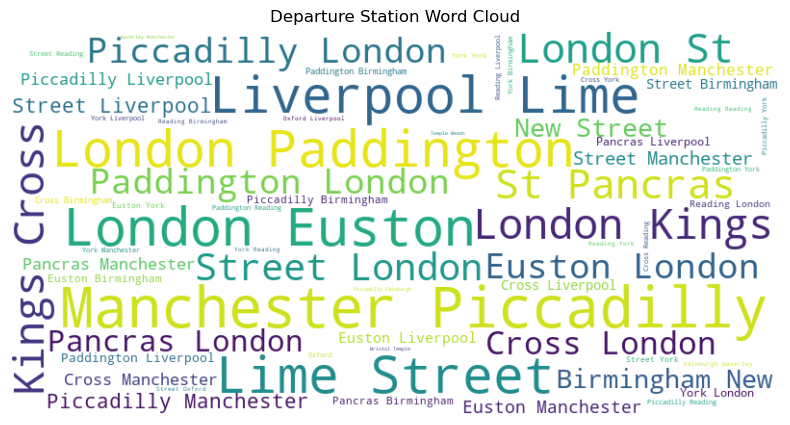

In [93]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the 'Departure Station' column from the dataset
departure_station = data['Departure Station']

# Display the first few rows of the 'Departure Station' column
print("Departure Station Column:")
print(departure_station.head())

# Concatenate all departure station names into a single string
text_departure = ' '.join(departure_station.dropna().astype(str))

# Create a WordCloud object for the 'Departure Station' column
wordcloud_departure = WordCloud(width=800, height=400, background_color='white').generate(text_departure)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_departure, interpolation='bilinear')
plt.title('Departure Station Word Cloud')
plt.axis('off')
plt.show()


   ### **Word Cloud for Arrival Destination**

Arrival Destination Column:
0    Liverpool Lime Street
1                     York
2    Manchester Piccadilly
3                  Reading
4            London Euston
Name: Arrival Destination, dtype: object


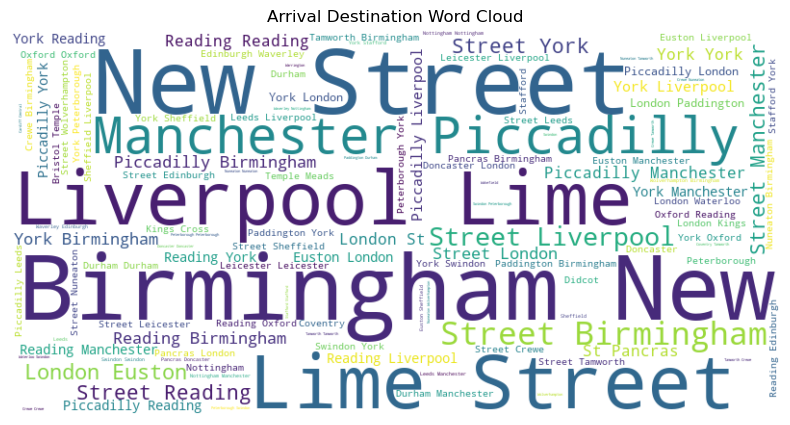

In [94]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the 'Arrival Destination' column from the dataset
arrival_destination = data['Arrival Destination']

# Display the first few rows of the 'Arrival Destination' column
print("Arrival Destination Column:")
print(arrival_destination.head())

# Concatenate all arrival destination names into a single string
text_arrival = ' '.join(arrival_destination.dropna().astype(str))

# Create a WordCloud object for the 'Arrival Destination' column
wordcloud_arrival = WordCloud(width=800, height=400, background_color='white').generate(text_arrival)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_arrival, interpolation='bilinear')
plt.title('Arrival Destination Word Cloud')
plt.axis('off')
plt.show()

### Steps to Resolve `DTypePromotionError`

1. **Identify and Convert Data Types**

   Make sure that all feature columns (`X_train`) and the target column (`y_train`) are of numeric types or categorical types that can be encoded into numeric values. `RandomForestClassifier` cannot handle datetime types directly, so you must convert them.

2. **Convert Datetime Columns**

   If you have datetime columns in `X_train`, you need to extract relevant features like year, month, day, hour, etc., or use other forms of encoding. You can convert datetime columns into numeric features as follows:


3. **Encode Categorical Variables**

   If you have categorical variables, you need to encode them into numeric values:

In [95]:
print(X_train.columns)

Index(['Journey Duration', 'Delay', 'Day of Week', 'Month',
       'Purchase Type_Station', 'Payment Method_Credit Card',
       'Payment Method_Debit Card'],
      dtype='object')


In [96]:
# Ensure 'Purchase Type' and other columns are in the DataFrame
categorical_cols = ['Purchase Type', 'Payment Method']  # Example categorical columns

# Print out the columns to check
print("Categorical columns:", categorical_cols)
print("Available columns in X_train:", X_train.columns.tolist())


Categorical columns: ['Purchase Type', 'Payment Method']
Available columns in X_train: ['Journey Duration', 'Delay', 'Day of Week', 'Month', 'Purchase Type_Station', 'Payment Method_Credit Card', 'Payment Method_Debit Card']


In [97]:
# Strip any leading/trailing spaces from column names if needed
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

# Re-check column names
print(X_train.columns)

Index(['Journey Duration', 'Delay', 'Day of Week', 'Month',
       'Purchase Type_Station', 'Payment Method_Credit Card',
       'Payment Method_Debit Card'],
      dtype='object')


In [98]:
# For example, if 'Purchase Type' was renamed to 'Type of Purchase'
categorical_cols = ['Type of Purchase', 'Payment Method']  # Updated column names

In [99]:
from sklearn.preprocessing import LabelEncoder

# Check for categorical columns
categorical_cols = ['Purchase Type', 'Payment Method']  # Update as needed

# Verify columns exist in the DataFrame
existing_cols = [col for col in categorical_cols if col in X_train.columns]
print("Existing categorical columns:", existing_cols)

# Initialize label encoders and encode existing columns
label_encoders = {}
for col in existing_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

Existing categorical columns: []


In [100]:
# Print column names of X_train to check for 'Purchase Type'
print("Columns in X_train:", X_train.columns.tolist())

Columns in X_train: ['Journey Duration', 'Delay', 'Day of Week', 'Month', 'Purchase Type_Station', 'Payment Method_Credit Card', 'Payment Method_Debit Card']


In [101]:
# Check for exact column names
print(X_train.columns)

Index(['Journey Duration', 'Delay', 'Day of Week', 'Month',
       'Purchase Type_Station', 'Payment Method_Credit Card',
       'Payment Method_Debit Card'],
      dtype='object')


In [102]:
# Check for exact column names
print(X_train.columns)

Index(['Journey Duration', 'Delay', 'Day of Week', 'Month',
       'Purchase Type_Station', 'Payment Method_Credit Card',
       'Payment Method_Debit Card'],
      dtype='object')


In [103]:
# Strip spaces from column names
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

# Re-check column names
print("Cleaned columns in X_train:", X_train.columns.tolist())

Cleaned columns in X_train: ['Journey Duration', 'Delay', 'Day of Week', 'Month', 'Purchase Type_Station', 'Payment Method_Credit Card', 'Payment Method_Debit Card']


In [104]:
# Update categorical columns list
categorical_cols = ['Actual Column Name', 'Another Column Name']  # Use correct column names

# Initialize label encoders and encode categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le
    else:
        print(f"Column '{col}' is not in the DataFrame.")

Column 'Actual Column Name' is not in the DataFrame.
Column 'Another Column Name' is not in the DataFrame.


In [105]:
from sklearn.preprocessing import LabelEncoder

# Print column names to ensure correct column names
print("Columns in X_train:", X_train.columns.tolist())

# Update categorical columns based on actual names in X_train
categorical_cols = ['Purchase Type', 'Payment Method']  # Update this list based on actual column names

# Strip spaces from column names
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()

# Initialize and apply label encoding for existing categorical columns
label_encoders = {}
for col in categorical_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le
    else:
        print(f"Column '{col}' is missing from the DataFrame.")

# Proceed with the model training


Columns in X_train: ['Journey Duration', 'Delay', 'Day of Week', 'Month', 'Purchase Type_Station', 'Payment Method_Credit Card', 'Payment Method_Debit Card']
Column 'Purchase Type' is missing from the DataFrame.
Column 'Payment Method' is missing from the DataFrame.


In [106]:
from sklearn.preprocessing import LabelEncoder

# Verify and print actual column names
print("Columns in X_train:", X_train.columns.tolist())

# Define categorical columns based on actual column names
categorical_cols = ['Purchase Type', 'Payment Method']  # Update this list as needed

# Initialize a dictionary to store the LabelEncoders for each column
label_encoders = {}

# Iterate over each categorical column
for col in categorical_cols:
    if col in X_train.columns:
        # Initialize and fit LabelEncoder
        le = LabelEncoder()
        # Convert to string to handle mixed data types
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Column '{col}' is missing from the DataFrame.")

# Display the transformed columns in X_train for verification
# Print only columns that exist in X_train
existing_categorical_cols = [col for col in categorical_cols if col in X_train.columns]
print("Transformed columns in X_train:", X_train[existing_categorical_cols].head())


Columns in X_train: ['Journey Duration', 'Delay', 'Day of Week', 'Month', 'Purchase Type_Station', 'Payment Method_Credit Card', 'Payment Method_Debit Card']
Column 'Purchase Type' is missing from the DataFrame.
Column 'Payment Method' is missing from the DataFrame.
Transformed columns in X_train: Empty DataFrame
Columns: []
Index: [29805, 12609, 28956, 22178, 12426]


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure that categorical variables are encoded
# (Assuming `data_encoded` is your DataFrame and that encoding has already been applied.)

# Check and handle missing values
X = data_encoded.drop(columns=['Journey Status_On Time'])
y = data_encoded['Journey Status_On Time']

# Check for missing values in X and y
print("Missing values in X:\n", X.isnull().sum())
print("Missing values in y:\n", y.isnull().sum())

# Drop or fill missing values if necessary
X = X.fillna(0)  # Example: Fill missing values with 0
# Alternatively, you might use more appropriate methods for imputation
# y = y.dropna()  # Remove rows where target y is missing

# Convert categorical columns to numerical values if needed
# Assuming that categorical encoding has been applied, else use LabelEncoder or OneHotEncoder

# Check data types
print("Data types in X:\n", X.dtypes)
print("Data type of y:\n", y.dtype)

# Convert data types if necessary (e.g., convert to numeric if they are not)
# Example: Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Ensure y is categorical or numeric
y = pd.Categorical(y).codes  # Convert categorical to numeric codes if y is categorical

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Missing values in X:
 Date of Purchase                       0
Price                                  0
Date of Journey                        0
Purchase Datetime                      0
Departure Datetime                     0
                                      ..
Reason for Delay_Technical Issue       0
Reason for Delay_Traffic               0
Reason for Delay_Weather               0
Reason for Delay_Weather Conditions    0
Refund Request_Yes                     0
Length: 54084, dtype: int64
Missing values in y:
 0
Data types in X:
 Date of Purchase                       datetime64[ns]
Price                                           int64
Date of Journey                        datetime64[ns]
Purchase Datetime                      datetime64[ns]
Departure Datetime                     datetime64[ns]
                                            ...      
Reason for Delay_Technical Issue                 bool
Reason for Delay_Traffic                         bool
Reason for Delay_Weather 

### 5. **Time Series Forecasting for the next four years**

In [108]:
!pip install fbprophet

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Paul\AppData\Local\Temp\pip-install-51eeoygu\pystan_96ae55247c894265ade4b46415164d56\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Us

In [109]:
pip install prophet

23:24:08 - cmdstanpy - INFO - Chain [1] start processing
23:24:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Paul\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Paul\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


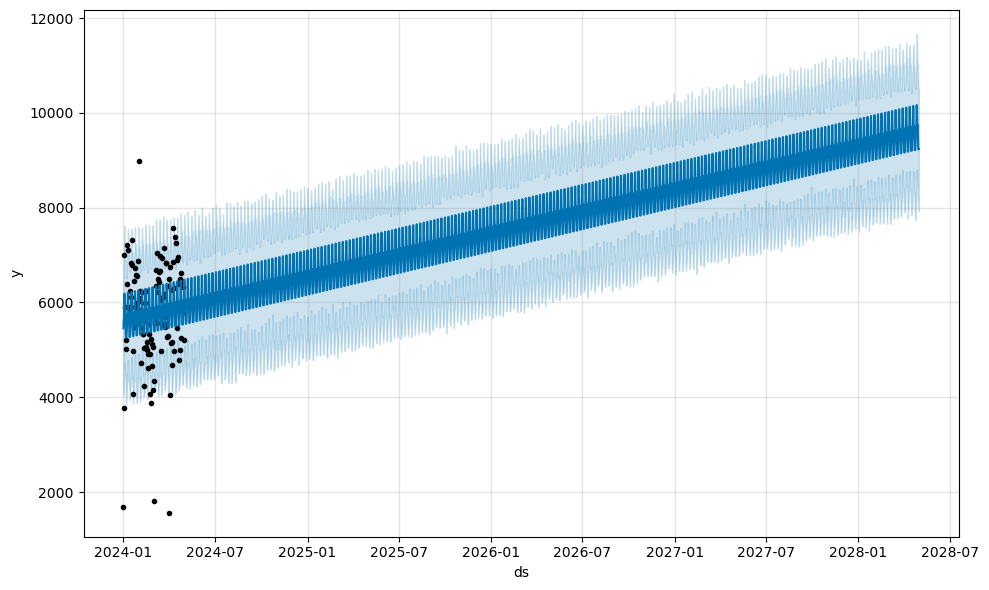

In [110]:
from prophet import Prophet
import pandas as pd

# Prepare the data
sales_data = data_cleaned.groupby('Date of Journey').agg({'Price': 'sum'}).reset_index()
sales_data.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for the value

# Initialize and fit the model
model = Prophet()
model.fit(sales_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=1461)  # For example, forecast for 4 year

# Make predictions
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)


In [111]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9961376994122586


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       467
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      5955
   macro avg       1.00      0.98      0.99      5955
weighted avg       1.00      1.00      1.00      5955



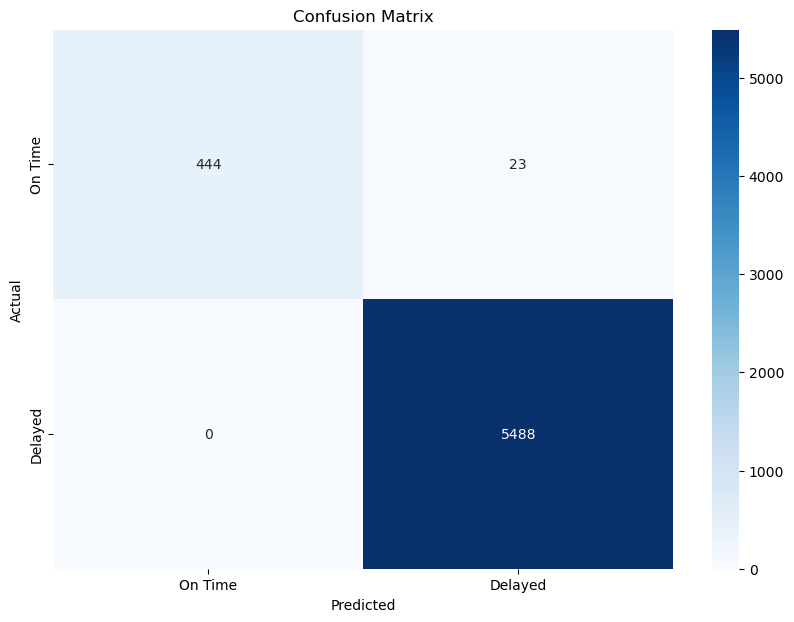

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **References**
1.	Artificial Intelligence in Transportation Information for Application. (2007). https://onlinepubs.trb.org/onlinepubs/circulars/ec113.pdf
2.	Aslam, M. (2024). National Rail UK Train Ticket Data. Kaggle.com. https://www.kaggle.com/datasets/motsimaslam/national-rail-uk-train-ticket-data
3.	ISO. (2022). ISO/IEC 27001 standard – information security management systems. ISO. https://www.iso.org/standard/27001
4.	NIST, G. M. (2024). Artificial Intelligence Risk Management Framework: Generative Artificial Intelligence Profile. Artificial Intelligence Risk Management Framework: Generative Artificial Intelligence Profile, NIST AI 600-1(NIST AI 600-1 2024). https://doi.org/10.6028/nist.ai.600-1
5.	Provost, F., & Fawcett, T. (2013, August 20). Data Science for Business [Book]. Www.oreilly.com. https://www.oreilly.com/library/view/data-science-for/9781449374273/
6.	Quick Start. (2017). Prophet. https://facebook.github.io/prophet/docs/quick_start.html
7.	Scikit-learn. (2019). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/index.html
8.	seaborn. (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. Pydata.org. https://seaborn.pydata.org/
9.	Tang, R., De Donato, L., Bes̆inovićN., Flammini, F., Goverde, R. M. P., Lin, Z., Liu, R., Tang, T., Vittorini, V., & Wang, Z. (2022). A literature review of Artificial Intelligence applications in railway systems. Transportation Research Part C: Emerging Technologies, 140(103679), 103679. https://doi.org/10.1016/j.trc.2022.103679
10.	with, L. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O’Reilly Online Learning. https://www.oreilly.com/library/view/hands-on-machine/9781492032632/
11.	Yu, R., Lu, J., Zhao, Z., Han, J., & Bai, L. (2019). Research on CMT Welding Temperature Field Detection Technology Based on Color CCD. 2019 3rd International Conference on Electronic Information Technology and Computer Engineering (EITCE). https://doi.org/10.1109/eitce47263.2019.9094932
